# Get the frequency ranges above the confidence interval


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

# Personal modules:
import array_to_dictionary_mod

## get the columns and name of coefficients

In [22]:
# get Gauss coefficient list

degreeAndOrder = 2
numOfGC = 8        # create a calculate total degree function?

GClist = array_to_dictionary_mod.get_GClist(degreeAndOrder, numOfGC)

fN = 1/400      # knot spacing 200 years

model = 'ggf100k'
gauss_coeffs_2D_document = 'ggf100k_coeffs_2D.txt'

coeffindex1 = 6
coeffindex2 = 2
smooth = 0.4
prewhiten = 2
units = 'year nT'
interval = 1

# col_GC would be coeffindex1 and row_GC would be coeffindex2
row_GC, col_GC = get_column_numbers(numOfGC)
outputfile = create_text_file(GClist, coeffindex1, coeffindex2, model, smooth, prewhiten, units, interval, gauss_coeffs_2D_document)

subprocess.run(['cross','cross_inputfile.txt'],shell=True)

## need to create function that gathers the combination of numbers for the text rows

In [23]:
def get_column_numbers(numOfGC):
    """Creates two vectors each index with combinations of numbers for the text file to run
    Input   : numOfGC number of Gauss coefficients, total number of Gauss coefficients
    Output  : row_GC is the index for the columns in the text for the row part of the matrix
            : col_GC is the index for the columns in the text for the column part of the matrix
    """
    
    assert type(numOfGC) == int, 'numOfGC is not an integer'

    # number of elements in the matrix
    numOfElements = (numOfGC*(numOfGC-1))/2+numOfGC

    # location of the diagonal
    diagLoc = ((np.arange(1,numOfGC+1))*(np.arange(1,numOfGC+1)-1)/2)+(np.arange(1,numOfGC+1))-1

    row_GC =  np.zeros(int(numOfElements))
    col_GC =  np.zeros(int(numOfElements))

    row_jindex = 1
    col_jindex = 1

    for index in range(0, int(numOfElements)):
        row_GC[index] = row_jindex
        col_GC[index] = col_jindex
        
        col_jindex+=1
        if index in diagLoc[0:-1]:
            row_jindex += 1
        
        if index in diagLoc[0:-1]:
            col_jindex = 1
        
    assert col_jindex-1 == numOfGC, 'The last index in the column is off'
    assert row_jindex   == numOfGC, 'The last index in the row is off'

    return row_GC, col_GC

In [ ]:

# creates the matrix


crossCoeffVec = np.zeros(int(numDiag))
numElem = 0
for index in range(1, numOfGC+1):
    for jindex in range(1, index+1):

        # I NEED TO CREATE THE DOCUMENT FIRST AND CALL COLUMN 6 OR 7

        #corrCoeff = np.corrcoef(ggf100k_dict[GClist[index]],ggf100k_dict[GClist[jindex]])
        #print('Element Number:',numElem,'1st:', GClist[index], '2nd:', GClist[jindex], 'correlation coefficient:',corrCoeff[(0,1)])
        #corrCoeffVec[numElem] = corrCoeff[(0,1)]
        #numElem+=1

#corrCoeffGC = np.zeros((numOfGC, numOfGC))
#corrCoeffGC[np.tril_indices(corrCoeffGC.shape[0], k=0)] = corrCoeffVec

## need to create text file for the combinations of cross spectrum

In [25]:
def create_text_file(GClist, coeffindex1, coeffindex2, model, smooth, prewhiten, units, interval, coeff_2Ddocument):
    """Creates the text file needed for the cross input file
    Input   : coeff1 will be S11
            : coeff2 will be S22
    Output  :   outputfile the cross 2D text will be stored as
    """

    assert type(coeffindex1) and type(coeffindex2) == int, 'coeffindex is not an integer'
    assert type(model) and type(coeff_2Ddocument) and type(units) == str
    assert type(GClist) == list
    assert type(smooth) and type(interval) == float or int, 'smooth or interval is not a float'

    outputfile = model+ '_cross_'+str.replace(GClist[coeffindex1],'_','')+str.replace(GClist[coeffindex2],'_','')

    with open('textdoc.txt', mode= 'w+') as f:
        f.write("file "+ coeff_2Ddocument +'\n')
        f.write("output " + outputfile +'\n')
        f.write("column " + str(coeffindex1) + ' ' + str(coeffindex2)     +'\n \n')
        f.write("unwrap \n")
        f.write("smooth "+ str(smooth)+ '\n')
        f.write("prewhiten " + str(prewhiten)+'\n \n')
        f.write("units " + units + '\n')
        f.write("interval " + str(interval)+ '\n \n')
        f.write("plot -none \n")
        f.write("logfreq \n")
        f.write("title not sure I need" + '\n \n')
        f.write("exec \n" )
        f.write("quit \n")
    
    return outputfile


## find frequency ranges

In [ ]:

def find_frequency_range(outputfile, fN):
    """Find the frequency where the coherence is above the confidence
    Input   : outputfile is the file from the cross function that will be loaded
            : fN is the Nyquist frequency
    """
    assert type(outputfile) == str,     'outputfile is not a string'
    assert type(fN)         == float,   'fN is float'

    cross_doc = np.load(outputfile)

    # Cuts the document to exclude frequency above the Nyquist
    index_fN = np.where(cross_doc[:,0]==fN)
    cross_doc = cross_doc[1:(index_fN[0][0]+1), :]

    

In [ ]:
# creates the matrix
numDiag = (numOfGC*(numOfGC-1))/2+numOfGC

crossCoeffVec = np.zeros(int(numDiag))
numElem = 0
for index in range(1, numOfGC+1):
    for jindex in range(1, index+1):

        # I NEED TO CREATE THE DOCUMENT FIRST AND CALL COLUMN 6 OR 7

        #corrCoeff = np.corrcoef(ggf100k_dict[GClist[index]],ggf100k_dict[GClist[jindex]])
        #print('Element Number:',numElem,'1st:', GClist[index], '2nd:', GClist[jindex], 'correlation coefficient:',corrCoeff[(0,1)])
        #corrCoeffVec[numElem] = corrCoeff[(0,1)]
        #numElem+=1

#corrCoeffGC = np.zeros((numOfGC, numOfGC))
#corrCoeffGC[np.tril_indices(corrCoeffGC.shape[0], k=0)] = corrCoeffVec

## plot psd

Text(0.5, 1.0, 'GGF100k PSD of ${g}^2_3$ and ${g}^1_2$')

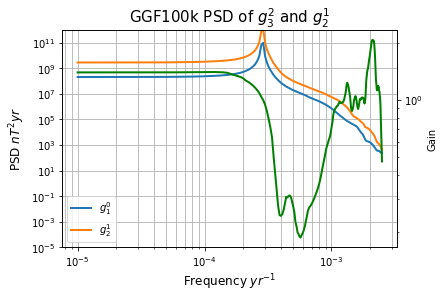

In [2]:
 # freq, S11, S22, Re S12, Im S12, gain, g12**2, PHI, Kopt

plt.figure()

plt.loglog(cross_g21_g10[:,0], cross_g21_g10[:,1],linewidth=2)
plt.loglog(cross_g21_g10[:,0], cross_g21_g10[:,2],linewidth=2)

plt.ylim([1e-5, 1e12])
# plt.xlim([1e-5, 1/400])
plt.grid(True, which = 'both', ls = '-')
plt.legend(['${g}^0_1$','${g}^1_2$'],loc='lower left')
plt.xlabel('Frequency $ yr^{-1}$',fontsize=12)
plt.ylabel('PSD $ nT^{2}yr$',fontsize=12)

plt.twinx()
plt.loglog(cross_g21_g10[:,0], cross_g21_g10[:,5],'g',linewidth=2)
plt.ylabel('Gain')

plt.title('GGF100k PSD of ${g}^2_3$ and ${g}^1_2$',fontsize=15)

## plot cross spectrum

Text(0.5, 1.0, 'GGF100k Cross-Spectrum of ${g}^2_3$ and ${g}^1_2$')

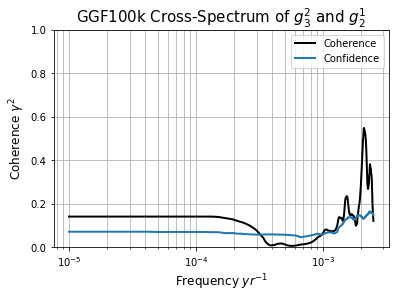

In [3]:
# fort.2 freq, S11, S22, Re S12, Im S12, gain, g12**2, PHI, Kopt

con95 = 1-np.power((0.05*np.ones(len(cross_g21_g10[:,8]))),1.5/(cross_g21_g10[:,8]-1))

plt.figure()

plt.semilogx(cross_g21_g10[:,0], cross_g21_g10[:,6],'k',linewidth=2)
plt.semilogx(cross_g21_g10[:,0], con95,linewidth=2)

plt.ylim([0, 1])
# plt.xlim([1e-5, 1/400])
plt.grid(True, which = 'both', ls = '-')

plt.legend(['Coherence','Confidence'])
plt.xlabel('Frequency $ yr^{-1}$',fontsize=12)
plt.ylabel('Coherence ${\gamma}^2$',fontsize=12)
plt.title('GGF100k Cross-Spectrum of ${g}^2_3$ and ${g}^1_2$',fontsize=15)

## below

In [4]:
# creater boolean array where coherence is greater than confidence

boolGreater = np.zeros(len(con95))
g12squared = cross_g21_g10[:,6]

for index, value in enumerate(g12squared):
    if value > con95[index]:
        boolGreater[index] = 1
    

diff_bool = np.diff(boolGreater)


In [5]:
# Get the range above confidence interval
# positive is going into range and negative is going out

diff_bool = np.diff(boolGreater)

if boolGreater[0] == 0 and boolGreater[-1] == 0:
    intoRange = (np.where(diff_bool == 1))[0][:]+1
    outRange  =  np.where(diff_bool == -1)[0]

if boolGreater[0] == 1 and boolGreater[-1] == 1:
    intoRange = np.insert((np.where(diff_bool == 1))[0][:]+1, 0,0)            # inserts range at the begining
    outRange  = np.append(np.where(diff_bool == -1)[0], len(boolGreater)-1)   # exit range at the end

if boolGreater[0] == 0 and boolGreater[-1] == 1:
    intoRange = (np.where(diff_bool == 1))[0][:]+1
    outRange  = np.append(np.where(diff_bool == -1)[0], len(boolGreater)-1)

if boolGreater[0] == 1 and boolGreater[-1] == 0:
    intoRange = np.insert((np.where(diff_bool == 1))[0][:]+1, 0,0)
    outRange  =  np.where(diff_bool == -1)[0]


Text(0.5, 1.0, 'GGF100k Cross-Spectrum of ${g}^2_3$ and ${g}^1_2$')

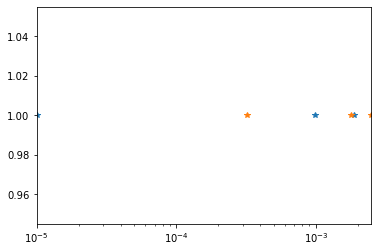

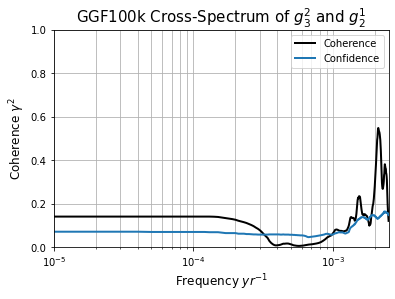

In [6]:
plt.figure()

plt.semilogx(cross_g21_g10[intoRange,0],np.ones(len(cross_g21_g10[intoRange,0])),'*')
plt.semilogx(cross_g21_g10[outRange,0],np.ones(len(cross_g21_g10[outRange,0])),'*')
plt.xlim([1e-5, 1/400])


plt.figure()

plt.semilogx(cross_g21_g10[:,0], cross_g21_g10[:,6],'k',linewidth=2)
plt.semilogx(cross_g21_g10[:,0], con95,linewidth=2)

plt.ylim([0, 1])
plt.xlim([1e-5, 1/400])
plt.grid(True, which = 'both', ls = '-')

plt.legend(['Coherence','Confidence'])
plt.xlabel('Frequency $ yr^{-1}$',fontsize=12)
plt.ylabel('Coherence ${\gamma}^2$',fontsize=12)
plt.title('GGF100k Cross-Spectrum of ${g}^2_3$ and ${g}^1_2$',fontsize=15)

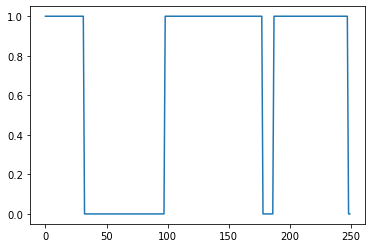

In [7]:
plt.figure()

plt.plot(boolGreater)
# plt.plot(locations, '*')